In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]




In [7]:
# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id')[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

We cleaned the dataset by removing unreliable rows where 'suspended' or 'stopped' was True and dropped rows with missing 'current_state' values. Missing data in other columns was imputed using the mean of each 'fixture_id' group, and any remaining missing values were filled with 0 to ensure data completeness and consistency for analysis.

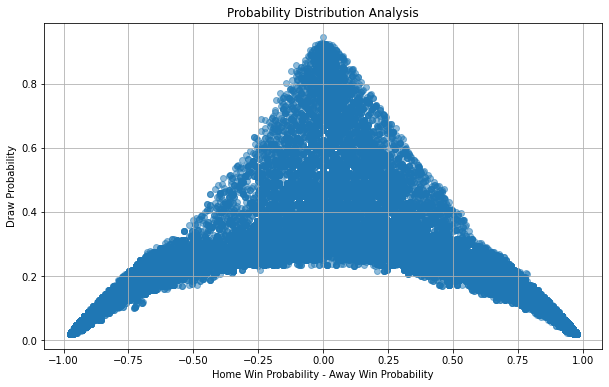

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]

# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id')[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Remove rows with missing values in '1', 'X', '2' columns
data.dropna(subset=['1', 'X', '2'], inplace=True)

# Calculate probabilities for home win, draw, and away win
data['home_prob'] = 1 / data['1']
data['draw_chance'] = 1 / data['X']
data['away_prob'] = 1 / data['2']

# Normalize the probabilities
data['total_probability'] = data['home_prob'] + data['draw_chance'] + data['away_prob']
data['normalized_home_prob'] = data['home_prob'] / data['total_probability']
data['normalized_draw_chance'] = data['draw_chance'] / data['total_probability']
data['normalized_away_prob'] = data['away_prob'] / data['total_probability']

# Calculate the difference between home win and away win probabilities
data['home_away_diff'] = data['normalized_home_prob'] - data['normalized_away_prob']

# Plot the distribution of probabilities
plt.figure(figsize=(10, 6))
plt.scatter(data['home_away_diff'], data['normalized_draw_chance'], alpha=0.5)
plt.xlabel("Home Win Probability - Away Win Probability")
plt.ylabel("Draw Probability")
plt.title("Probability Distribution Analysis")
plt.grid()
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]


# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id')[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Remove rows with missing values in '1', 'X', '2' columns
data.dropna(subset=['1', 'X', '2'], inplace=True)

# Calculate probabilities for home win, draw, and away win
data['home_prob'] = 1 / data['1']
data['draw_chance'] = 1 / data['X']
data['away_prob'] = 1 / data['2']

# Normalize the probabilities
data['total_probability'] = data['home_prob'] + data['draw_chance'] + data['away_prob']
data['normalized_home_prob'] = data['home_prob'] / data['total_probability']
data['normalized_draw_chance'] = data['draw_chance'] / data['total_probability']
data['normalized_away_prob'] = data['away_prob'] / data['total_probability']

# Calculate the difference between home win and away win probabilities
data['home_away_diff'] = data['normalized_home_prob'] - data['normalized_away_prob']


# Create bin intervals between -1 and 1
bin_intervals = np.linspace(-1, 1, 21)
data['diff_bin'] = pd.cut(data['home_away_diff'], bins=bin_intervals)

# Analyze each bin for draw probability and total counts
bin_analysis = data.groupby('diff_bin').agg(
    draw_probability=('result', lambda x: (x == 'X').mean()),
    total_count=('result', 'size'),
    draw_count=('result', lambda x: (x == 'X').sum())
).reset_index()

# Display the result of the bin analysis
print(bin_analysis)


        diff_bin  draw_probability  total_count  draw_count
0   (-1.0, -0.9]          0.032928         1974          65
1   (-0.9, -0.8]          0.121766         2242         273
2   (-0.8, -0.7]          0.152206         2017         307
3   (-0.7, -0.6]          0.244040         1594         389
4   (-0.6, -0.5]          0.251451         1551         390
5   (-0.5, -0.4]          0.335526         1520         510
6   (-0.4, -0.3]          0.283305         1779         504
7   (-0.3, -0.2]          0.346589         2389         828
8   (-0.2, -0.1]          0.373731         3251        1215
9    (-0.1, 0.0]          0.396396         3996        1584
10    (0.0, 0.1]          0.472553         4791        2264
11    (0.1, 0.2]          0.467125         4654        2174
12    (0.2, 0.3]          0.375078         3218        1207
13    (0.3, 0.4]          0.334030         2871         959
14    (0.4, 0.5]          0.279831         2598         727
15    (0.5, 0.6]          0.195111      

/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/3171789542.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = data.groupby('diff_bin').agg(


/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/733094535.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = data.groupby('diff_bin').agg(
/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/733094535.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_half_bin_analysis = first_half_data.groupby('diff_bin')['result'].apply(lambda x: (x == 'X').mean()).reset_index()
/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/733094535.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

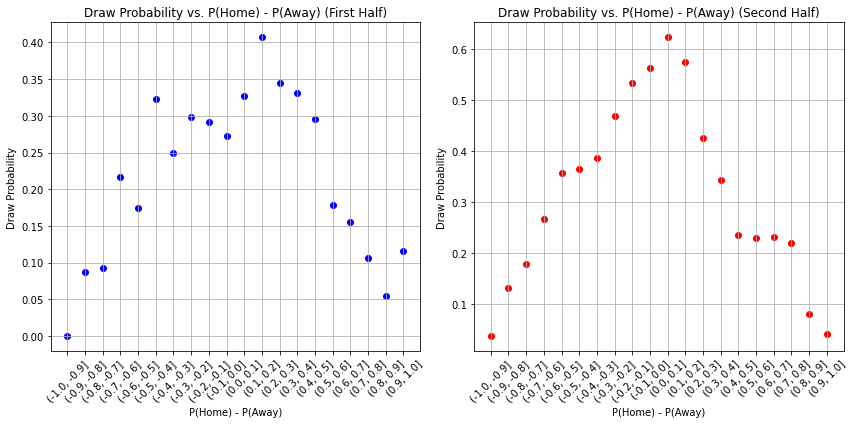

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]



# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id')[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Remove rows with missing values in '1', 'X', '2' columns
data.dropna(subset=['1', 'X', '2'], inplace=True)

# Calculate probabilities for home win, draw, and away win
data['home_prob'] = 1 / data['1']
data['draw_chance'] = 1 / data['X']
data['away_prob'] = 1 / data['2']

# Normalize the probabilities
data['total_probability'] = data['home_prob'] + data['draw_chance'] + data['away_prob']
data['normalized_home_prob'] = data['home_prob'] / data['total_probability']
data['normalized_draw_chance'] = data['draw_chance'] / data['total_probability']
data['normalized_away_prob'] = data['away_prob'] / data['total_probability']

# Calculate the difference between home win and away win probabilities
data['home_away_diff'] = data['normalized_home_prob'] - data['normalized_away_prob']


# Create bin intervals between -1 and 1
bin_intervals = np.linspace(-1, 1, 21)
data['diff_bin'] = pd.cut(data['home_away_diff'], bins=bin_intervals)

# Analyze each bin for draw probability and total counts
bin_analysis = data.groupby('diff_bin').agg(
    draw_probability=('result', lambda x: (x == 'X').mean()),
    total_count=('result', 'size'),
    draw_count=('result', lambda x: (x == 'X').sum())
).reset_index()

# Separate first-half and second-half data
first_half_data = data[data['halftime'] == '1st-half']
second_half_data = data[data['halftime'] == '2nd-half']

# Analyze each bin for the first half
first_half_bin_analysis = first_half_data.groupby('diff_bin')['result'].apply(lambda x: (x == 'X').mean()).reset_index()
first_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

# Analyze each bin for the second half
second_half_bin_analysis = second_half_data.groupby('diff_bin')['result'].apply(lambda x: (x == 'X').mean()).reset_index()
second_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

# Plot draw probability for both halves using scatter plots
plt.figure(figsize=(12, 6))

# First half plot
plt.subplot(1, 2, 1)
plt.scatter(first_half_bin_analysis['Bin'].astype(str), first_half_bin_analysis['Draw_Probability'], color='blue')
plt.title("Draw Probability vs. P(Home) - P(Away) (First Half)")
plt.xlabel("P(Home) - P(Away)")
plt.ylabel("Draw Probability")
plt.xticks(rotation=45)
plt.grid()

# Second half plot
plt.subplot(1, 2, 2)
plt.scatter(second_half_bin_analysis['Bin'].astype(str), second_half_bin_analysis['Draw_Probability'], color='red')
plt.title("Draw Probability vs. P(Home) - P(Away) (Second Half)")
plt.xlabel("P(Home) - P(Away)")
plt.ylabel("Draw Probability")
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

It is apparent that a slight bias exists in the data caused by I believe in the frist half despite the all forecasting effort not all aspects of situation of players is known and it becomes more clear with observing the each player at the first half. During the first half, it can be observed that the probability of a draw is higher in situations where the likelihood of the home team winning is lower, compared to cases where the away team's win probability is lower. This pattern is likely due to the advantage the home team has when playing in their own stadium, which increases their chances of converting a potential loss into a draw. This advantage is also reflected in betting market dynamics, where the perceived probability of the home team turning a loss into a draw is higher due to the home advantage.

When comparing the first and second halves, the second half appears to exhibit a more consistent and structured pattern. The main reason for this is the gradual reduction in the amount of time remaining in the match. As time decreases, both the home and away teams have fewer opportunities to change the outcome, leading to a reduction in the probability of a draw. This is because, as the remaining time diminish, the chance of the leading team maintaining their advantage increases, making the final outcome more predictable. This effect results in the second half having a more stable and clear pattern compared to the first half.

Number of rows removed due to late goals: 1886
Number of matches removed due to early red cards: 528


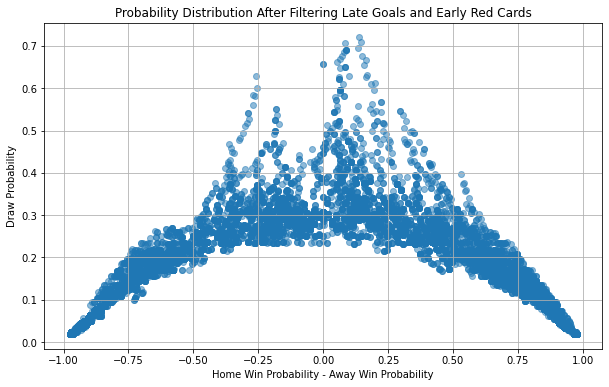

      P_diff_bin  Draw_Probability  Total_Count  Draw_Count
0   (-1.0, -0.9]          0.004776         1047           5
1   (-0.9, -0.8]          0.002747          728           2
2   (-0.8, -0.7]          0.000000          584           0
3   (-0.7, -0.6]          0.034623          491          17
4   (-0.6, -0.5]          0.000000          392           0
5   (-0.5, -0.4]          0.000000          263           0
6   (-0.4, -0.3]          0.002304          434           1
7   (-0.3, -0.2]          0.069620          474          33
8   (-0.2, -0.1]          0.026515          528          14
9    (-0.1, 0.0]          0.123123          333          41
10    (0.0, 0.1]          0.137097          372          51
11    (0.1, 0.2]          0.002028          493           1
12    (0.2, 0.3]          0.085253          434          37
13    (0.3, 0.4]          0.014320          419           6
14    (0.4, 0.5]          0.000000          630           0
15    (0.5, 0.6]          0.000000      

/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/1924602439.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = filtered_data.groupby('P_diff_bin').agg(
/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/1924602439.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_data['P_diff_bin'] = pd.cut(first_half_data['home_away_diff'], bins=bin_intervals)
/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/1924602439.py:99: FutureWarning: The default of observed=False is deprecated and will be ch

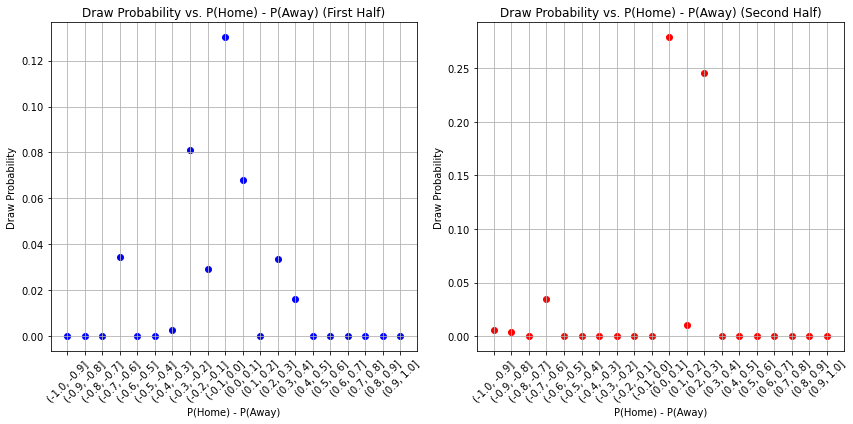

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]

# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id', observed=True)[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Remove rows with missing values in '1', 'X', '2' columns
data.dropna(subset=['1', 'X', '2'], inplace=True)

# Filter out matches with late goals
late_goal_games = data[(data['minute'] > 45) & (data['halftime'] == '2nd-half')]
matches_to_remove_late = pd.concat([late_goal_games['fixture_id']]).unique()
filtered_data = data[~data['fixture_id'].isin(matches_to_remove_late)]

# Count removed matches for late goals
removed_late_goal_count = len(late_goal_games)
print(f"Number of rows removed due to late goals: {removed_late_goal_count}")

# Filter out matches with early red cards
early_red_card_games = data[(data['Redcards - home'] > 0) & (data['minute'] <= 15) | (data['Redcards - away'] > 0) & (data['minute'] <= 15)]
matches_to_remove_red = pd.concat([early_red_card_games['fixture_id']]).unique()
filtered_data = filtered_data[~filtered_data['fixture_id'].isin(matches_to_remove_red)]

# Count removed matches for early red cards
removed_early_red_card_count = len(early_red_card_games)
print(f"Number of matches removed due to early red cards: {removed_early_red_card_count}")

# Calculate probabilities for home win, draw, and away win
filtered_data['home_prob'] = 1 / filtered_data['1']
filtered_data['draw_chance'] = 1 / filtered_data['X']
filtered_data['away_prob'] = 1 / filtered_data['2']

# Normalize the probabilities
filtered_data['total_probability'] = filtered_data['home_prob'] + filtered_data['draw_chance'] + filtered_data['away_prob']
filtered_data['normalized_home_prob'] = filtered_data['home_prob'] / filtered_data['total_probability']
filtered_data['normalized_draw_chance'] = filtered_data['draw_chance'] / filtered_data['total_probability']
filtered_data['normalized_away_prob'] = filtered_data['away_prob'] / filtered_data['total_probability']

# Calculate the difference between home win and away win probabilities
filtered_data['home_away_diff'] = filtered_data['normalized_home_prob'] - filtered_data['normalized_away_prob']

# Plot the distribution of probabilities
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['home_away_diff'], filtered_data['normalized_draw_chance'], alpha=0.5)
plt.xlabel("Home Win Probability - Away Win Probability")
plt.ylabel("Draw Probability")
plt.title("Probability Distribution After Filtering Late Goals and Early Red Cards")
plt.grid()
plt.show()

# Create bin intervals between -1 and 1
bin_intervals = np.linspace(-1, 1, 21)
filtered_data['P_diff_bin'] = pd.cut(filtered_data['home_away_diff'], bins=bin_intervals)

# Perform bin analysis
bin_analysis = filtered_data.groupby('P_diff_bin').agg(
    Draw_Probability=('result', lambda x: (x == 'X').mean()),
    Total_Count=('result', 'size'),
    Draw_Count=('result', lambda x: (x == 'X').sum())
).reset_index()

# Print bin analysis
print(bin_analysis)

# Separate first-half and second-half data
first_half_data = filtered_data[filtered_data['halftime'] == '1st-half']
second_half_data = filtered_data[filtered_data['halftime'] == '2nd-half']

# Analyze each bin for the first half
first_half_data['P_diff_bin'] = pd.cut(first_half_data['home_away_diff'], bins=bin_intervals)
first_half_bin_analysis = first_half_data.groupby('P_diff_bin')['result'].apply(lambda x: (x == 'X').mean()).reset_index()
first_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

# Analyze each bin for the second half
second_half_data['P_diff_bin'] = pd.cut(second_half_data['home_away_diff'], bins=bin_intervals)
second_half_bin_analysis = second_half_data.groupby('P_diff_bin')['result'].apply(lambda x: (x == 'X').mean()).reset_index()
second_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

# Plot draw probability for both halves using scatter plots
plt.figure(figsize=(12, 6))

# First half plot
plt.subplot(1, 2, 1)
plt.scatter(first_half_bin_analysis['Bin'].astype(str), first_half_bin_analysis['Draw_Probability'], color='blue')
plt.title("Draw Probability vs. P(Home) - P(Away) (First Half)")
plt.xlabel("P(Home) - P(Away)")
plt.ylabel("Draw Probability")
plt.xticks(rotation=45)
plt.grid()

# Second half plot
plt.subplot(1, 2, 2)
plt.scatter(second_half_bin_analysis['Bin'].astype(str), second_half_bin_analysis['Draw_Probability'], color='red')
plt.title("Draw Probability vs. P(Home) - P(Away) (Second Half)")
plt.xlabel("P(Home) - P(Away)")
plt.ylabel("Draw Probability")
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()



For speaking in the favor of the probability distribution graph the highest draw probabilities (≈0.6) occur around P(Home) - P(Away) ≈ 0, indicating that balanced matches are most likely to result in draws.
This reinforces the natural equilibrium in football when teams are evenly matched, as neither team can dominate or break the tie effectively.
The removal of late goals prevents artificially high probabilities caused by last-minute match-deciding events.
Similarly, removing early red cards avoids situations where the balance shifts too heavily in favor of one team early in the game. As a result, the central peak becomes sharper and more defined, focusing on the "pure" match dynamics.

First Half:
Low Draw Probabilities:
Draw probabilities are relatively low across all bins, peaking at around 0.12 in the central range (P(Home) - P(Away) ≈ 0).
This reflects the nature of the first half, where teams typically focus on understanding their opponent and forming strategies, rather than settling into a draw.
Extreme Values (P(Home) - P(Away) ≈ ±1):
Draw probabilities are nearly zero at extreme bins, aligning with expectations that a large imbalance in team performance early in the match rarely results in a tie.
The removal of early red cards ensures that the analysis focuses on "normal" gameplay scenarios, which is why the bins near the extremes show a minimal influence from disruptions.

Second Half:
Higher Draw Probabilities:
Draw probabilities increase significantly in the second half, peaking at approximately 0.25 in the central range (P(Home) - P(Away) ≈ 0).
As time becomes a limiting factor, teams often adopt more defensive strategies, leading to higher draw probabilities, particularly in balanced matches.
Extreme Values (P(Home) - P(Away) ≈ ±1):
Draw probabilities remain close to zero at the extremes, indicating that one-sided matches are unlikely to result in draws, even as the match progresses.
The removal of late goals refines the dataset, eliminating outliers where late-match events could have artificially increased or decreased draw probabilities. As a result, the second-half probabilities present a cleaner representation of natural gameplay tendencies.
The first half is exploratory, with lower draw probabilities across all ranges, reflecting teams' focus on strategy and testing their opponent.
The second half shows a significant increase in draw probabilities, particularly in balanced matches, as teams shift towards risk-averse strategies to preserve their standings.
Filtering disruptive events like late goals and early red cards provides a cleaner view of these tendencies, highlighting the core dynamics of football matches in their natural state


Accuracy: 95.74%


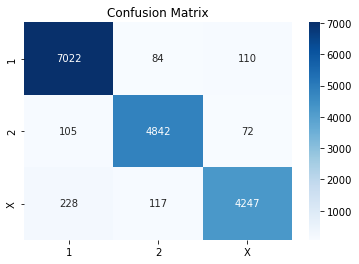

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]


# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id', observed=True)[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Remove rows with missing values in '1', 'X', '2' columns
data.dropna(subset=['1', 'X', '2'], inplace=True)

# Calculate probabilities for home win, draw, and away win
data['home_prob'] = 1 / data['1']
data['draw_chance'] = 1 / data['X']
data['away_prob'] = 1 / data['2']

# Normalize the probabilities
data['total_probability'] = data['home_prob'] + data['draw_chance'] + data['away_prob']
data['normalized_home_prob'] = data['home_prob'] / data['total_probability']
data['normalized_draw_chance'] = data['draw_chance'] / data['total_probability']
data['normalized_away_prob'] = data['away_prob'] / data['total_probability']

# Calculate the difference between home win and away win probabilities
data['home_away_diff'] = data['normalized_home_prob'] - data['normalized_away_prob']

# Drop unnecessary columns and prepare for decision tree
label_encoder = LabelEncoder()
data['halftime'] = label_encoder.fit_transform(data['halftime'].astype(str))
data['result'] = label_encoder.fit_transform(data['result'].astype(str))
data['current_state'] = label_encoder.fit_transform(data['current_state'].astype(str))

columns_to_drop = ['result', 'current_time', 'half_start_datetime', 'match_start_datetime', 
                   'latest_bookmaker_update', 'suspended', 'stopped', 'ticking', 'final_score', 'name', 'P_diff_bin']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

X = data.drop(columns=columns_to_drop)
y = data['result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]


# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id', observed=True)[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Remove rows with missing values in '1', 'X', '2' columns
data.dropna(subset=['1', 'X', '2'], inplace=True)

# Calculate probabilities for home win, draw, and away win
data['home_prob'] = 1 / data['1']
data['draw_chance'] = 1 / data['X']
data['away_prob'] = 1 / data['2']

# Normalize the probabilities
data['total_probability'] = data['home_prob'] + data['draw_chance'] + data['away_prob']
data['normalized_home_prob'] = data['home_prob'] / data['total_probability']
data['normalized_draw_chance'] = data['draw_chance'] / data['total_probability']
data['normalized_away_prob'] = data['away_prob'] / data['total_probability']

# Calculate the difference between home win and away win probabilities
data['home_away_diff'] = data['normalized_home_prob'] - data['normalized_away_prob']

# Drop unnecessary columns and prepare for decision tree
label_encoder = LabelEncoder()
data['halftime'] = label_encoder.fit_transform(data['halftime'].astype(str))
data['result'] = label_encoder.fit_transform(data['result'].astype(str))
data['current_state'] = label_encoder.fit_transform(data['current_state'].astype(str))

columns_to_drop = ['result', 'current_time', 'half_start_datetime', 'match_start_datetime', 
                   'latest_bookmaker_update', 'suspended', 'stopped', 'ticking', 'final_score', 'name', 'P_diff_bin']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

X = data.drop(columns=columns_to_drop)
y = data['result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Analyze misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indices]
misclassified_samples['true_label'] = y_test.iloc[misclassified_indices].values
misclassified_samples['predicted_label'] = y_pred[misclassified_indices]

# Select relevant columns for time analysis
time_analysis = misclassified_samples[['minute', 'halftime', 'true_label', 'predicted_label']]

# Group by halftime, minute, and label combinations
error_summary = time_analysis.groupby(['halftime', 'minute', 'true_label', 'predicted_label']).size().reset_index(name='error_count')

# Print error summary
print("Summary of misclassifications:")
print(error_summary)


Accuracy: 95.74%
Summary of misclassifications:
     halftime  minute  true_label  predicted_label  error_count
0           0       0           0                2            3
1           0       0           1                0            2
2           0       0           1                2            1
3           0       0           2                0            1
4           0       1           0                1            2
..        ...     ...         ...              ...          ...
367         1      51           2                1            2
368         1      52           2                1            1
369         1      53           2                0            1
370         1      53           2                1            1
371         1      56           1                0            1

[372 rows x 5 columns]


/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/614169399.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['true_label'] = y_test.iloc[misclassified_indices].values
/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/614169399.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['predicted_label'] = y_pred[misclassified_indices]


In [31]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove rows where 'suspended' or 'stopped' is True
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Identify columns with missing values and count them
missing_columns = data.isnull().sum()

# Filter and display columns that have more than 0 missing values
missing_columns = missing_columns[missing_columns > 0]

# Remove rows with missing values in 'current_state' column
data.dropna(subset=['current_state'], inplace=True)

# Fill missing values for other columns using the mean of 'fixture_id' groups
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id', observed=True)[column].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values with 0
data.fillna(0, inplace=True)

# Remove rows with missing values in '1', 'X', '2' columns
data.dropna(subset=['1', 'X', '2'], inplace=True)

# Calculate probabilities for home win, draw, and away win
data['home_prob'] = 1 / data['1']
data['draw_chance'] = 1 / data['X']
data['away_prob'] = 1 / data['2']

# Normalize the probabilities
data['total_probability'] = data['home_prob'] + data['draw_chance'] + data['away_prob']
data['normalized_home_prob'] = data['home_prob'] / data['total_probability']
data['normalized_draw_chance'] = data['draw_chance'] / data['total_probability']
data['normalized_away_prob'] = data['away_prob'] / data['total_probability']

# Calculate the difference between home win and away win probabilities
data['home_away_diff'] = data['normalized_home_prob'] - data['normalized_away_prob']

# Drop unnecessary columns and prepare for decision tree
label_encoder = LabelEncoder()
data['halftime'] = label_encoder.fit_transform(data['halftime'].astype(str))
data['result'] = label_encoder.fit_transform(data['result'].astype(str))
data['current_state'] = label_encoder.fit_transform(data['current_state'].astype(str))

columns_to_drop = ['result', 'current_time', 'half_start_datetime', 'match_start_datetime', 
                   'latest_bookmaker_update', 'suspended', 'stopped', 'ticking', 'final_score', 'name', 'P_diff_bin']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

X = data.drop(columns=columns_to_drop)
y = data['result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Analyze misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indices]
misclassified_samples['true_label'] = y_test.iloc[misclassified_indices].values
misclassified_samples['predicted_label'] = y_pred[misclassified_indices]

# Select relevant columns for time analysis
time_analysis = misclassified_samples[['minute', 'halftime', 'true_label', 'predicted_label']]

# Group by halftime, minute, and label combinations
error_summary = time_analysis.groupby(['halftime', 'minute', 'true_label', 'predicted_label']).size().reset_index(name='error_count')

# Print error summary
print("Summary of misclassifications:")
print(error_summary)

# Highlight key metrics from the analysis
most_common_errors = error_summary.sort_values(by='error_count', ascending=False).head(5)
print("Most common misclassifications:")
print(most_common_errors)

# Analyze the range of minutes where errors occur
minute_range = (time_analysis['minute'].min(), time_analysis['minute'].max())
print(f"Errors occur between minutes {minute_range[0]} and {minute_range[1]}.")

# Count errors per halftime
halftime_errors = time_analysis['halftime'].value_counts()
print("Error counts per halftime:")
print(halftime_errors)

# Identify specific minutes with highest errors
minute_error_summary = time_analysis['minute'].value_counts().head(10)
print("Top 10 minutes with highest errors:")
print(minute_error_summary)


Accuracy: 95.74%
Summary of misclassifications:
     halftime  minute  true_label  predicted_label  error_count
0           0       0           0                2            3
1           0       0           1                0            2
2           0       0           1                2            1
3           0       0           2                0            1
4           0       1           0                1            2
..        ...     ...         ...              ...          ...
367         1      51           2                1            2
368         1      52           2                1            1
369         1      53           2                0            1
370         1      53           2                1            1
371         1      56           1                0            1

[372 rows x 5 columns]
Most common misclassifications:
    halftime  minute  true_label  predicted_label  error_count
18         0       3           2                0           10
30

/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/3467841347.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['true_label'] = y_test.iloc[misclassified_indices].values
/var/folders/7t/962nrx_d3msdjwpjxsxck3tr0000gn/T/ipykernel_18429/3467841347.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['predicted_label'] = y_pred[misclassified_indices]


The decision tree achieved nearly 96% accuracy, but misclassifications highlight trends in specific game periods. Errors are most common in the early minutes (e.g., 3rd, 4th, and 6th minutes) due to limited early-game data, leading the model to rely on pre-game probabilities. The range of errors spans from the start to minute 56, with more errors in the first half (446 vs. 270 in the second half). Key minutes, such as the first 10, account for the highest errors, indicating that additional features or real-time data could improve model predictions during these periods.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data with proper encoding
data = pd.read_csv('match_data.csv', encoding='latin1')

# Remove unnecessary columns
columns_to_drop = ['result', 'current_time', 'half_start_datetime', 'match_start_datetime', 
                   'latest_bookmaker_update', 'suspended', 'stopped', 'ticking', 'final_score', 'name', 'P_diff_bin']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

X = data.drop(columns=columns_to_drop)
y = data['result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20)
clf.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Sort feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)
